## 4. Important microbial marker identification

In this section, we are going to calculate the global feature importance (GFI) to find out the key microbes that contributes to the CRC detection model. The *simply-explainer* is used to calculate the GFI, more about the AggMapNet model exaplaination can be found [**here**](https://bidd-aggmap.readthedocs.io/en/latest/_HPs/hps_content.html#AggMapNet-Explainers). By calculating the importance score for each microbes, we can draw the saliency-map to find out the hot zone in the **2D-microbiomeprints**.

[**Saliency-Map**](https://www.geeksforgeeks.org/what-is-saliency-map/) is an image in which the brightness of a pixel represents how salient the pixel is i.e brightness of a pixel is directly proportional to its saliency. It is generally a grayscale image. Saliency maps are also called as a heat map where hotness refers to those regions of the image which have a big impact on predicting the class which the object belongs to. 

The purpose of the saliency-map is to find the regions which are prominent or noticeable at every location in the visual field and to guide the selection of attended locations, based on the spatial distribution of saliency. 





[4.1 Calculate the global feature importance](#4.1-Calculate-the-global-feature-importance)

* [4.1.1 GFI for model trained on overall MEGMA Fmaps](#4.1.1-GFI-for-model-trained-on-overall-MEGMA-Fmaps)

* [4.1.2 GFI for model trained on country specific MEGMA Fmaps](#4.1.2-GFI-for-model-trained-on-country-specific-MEGMA-Fmaps)

[4.2 Generate the explaination saliency map](#4.2-Generate-the-explaination-saliency-map) 

* [4.2.1 Saliency map for overall MEGMA Fmaps](#4.2.1-Saliency-map-for-overall-MEGMA-Fmaps)

* [4.2.2 Saliency map country specific MEGMA Fmaps](#4.2.2-Saliency-map-country-specific-MEGMA-Fmaps)

[4.3 Global feature importance correlation](#4.3-Global-feature-importance-correlation) 

[4.4 Discussions and conclusions on saliency map](#4.4-Discussions-and-conclusions-on-saliency-map) 

In [40]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
import os
sns.set(style='white',  font='sans-serif', font_scale=2)


from aggmap import loadmap, AggMapNet
from aggmap.AggMapNet import load_model

### 4.1 Calculate the global feature importance

Let's calculate the GFI first. We need to reload the trained model that dumped in the disk. After that, we will use the `simply_explainer` to calculate GFI based on the training set data (i.e., the one country data used to train the model).

#### 4.1.1 GFI for model trained on overall MEGMA Fmaps

The global feature importance is calculated based on the training set. Once we got the GFI values, The megma object can help us to reshape the GFI vector to the saliency map. 


In [41]:
countries = ['AUS', 'CHN', 'DEU', 'FRA', 'USA'] 

model_dir = './megma_overall_model'
# load the pre-fitted megma_all object
megma = loadmap('./megma/megma.all')

gfis = []
for country in countries:
    clf = load_model(os.path.join(model_dir, 'aggmapnet.%s' % country),  gpuid=0)
    sxp = AggMapNet.simply_explainer(clf, megma, 
                                     backgroud = 'global_min', 
                                     apply_smoothing = True)
    gfi = sxp.global_explain()
    gfis.append(gfi.simply_importance_class_0.to_frame(name = country))
    
dfimp1 = pd.concat(gfis, axis=1)

2022-08-23 14:50:40,816 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:50:40,876 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 870/870 [00:06<00:00, 144.03it/s]

2022-08-23 14:50:46,919 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:07<00:00, 115.34it/s]


2022-08-23 14:50:54,534 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:50:54,590 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 870/870 [00:08<00:00, 101.50it/s]

2022-08-23 14:51:03,164 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:08<00:00, 102.50it/s]

2022-08-23 14:51:11,728 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set


2022-08-23 14:51:11,783 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 870/870 [00:07<00:00, 118.12it/s]

2022-08-23 14:51:19,151 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:07<00:00, 110.75it/s]

2022-08-23 14:51:27,072 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:51:27,126 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|################################################################################| 870/870 [00:06<00:00, 131.94it/s]

2022-08-23 14:51:33,724 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:06<00:00, 125.66it/s]

2022-08-23 14:51:40,716 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:51:40,772 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|################################################################################| 870/870 [00:06<00:00, 129.03it/s]

2022-08-23 14:51:47,517 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:06<00:00, 132.44it/s]


#### 4.1.2 GFI for model trained on country specific MEGMA Fmaps


In [42]:
model_dir = './megma_country_model'

gfis2 = []
reshape_indexes = {}
for country in countries:
    #load the country-specific megma
    megma = loadmap('./megma/megma.%s' % country)
    clf = load_model(os.path.join(model_dir, 'aggmapnet.%s' % country),  gpuid=0)
    sxp = AggMapNet.simply_explainer(clf, megma, 
                                     backgroud = 'global_min', 
                                     apply_smoothing = True)
    gfi2 = sxp.global_explain(clf.X_, clf.y_)
    gfis2.append(gfi2.simply_importance_class_0.to_frame(name = country))
    
    ## megma is different, therefore the reshape index and fmap_shape is also different
    reshape_index = megma.feature_names_reshape
    reshape_indexes.update({country: (megma.fmap_shape, reshape_index)})
    
dfimp2 = pd.concat(gfis2, axis=1)

2022-08-23 14:51:54,224 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 756/756 [00:06<00:00, 124.74it/s]

2022-08-23 14:52:00,286 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 756/756 [00:06<00:00, 116.17it/s]


2022-08-23 14:52:06,921 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 650/650 [00:05<00:00, 110.10it/s]

2022-08-23 14:52:12,828 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 650/650 [00:05<00:00, 108.49it/s]

2022-08-23 14:52:18,950 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|#################################################################################| 756/756 [00:08<00:00, 91.79it/s]

2022-08-23 14:52:27,189 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 756/756 [00:06<00:00, 108.12it/s]


2022-08-23 14:52:34,320 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 784/784 [00:06<00:00, 115.26it/s]

2022-08-23 14:52:41,124 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 784/784 [00:07<00:00, 108.63it/s]

2022-08-23 14:52:48,476 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|################################################################################| 756/756 [00:05<00:00, 132.63it/s]

2022-08-23 14:52:54,178 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 756/756 [00:05<00:00, 136.45it/s]


### 4.2 Generate the explaination saliency map



#### 4.2.1 Saliency map for overall MEGMA Fmaps



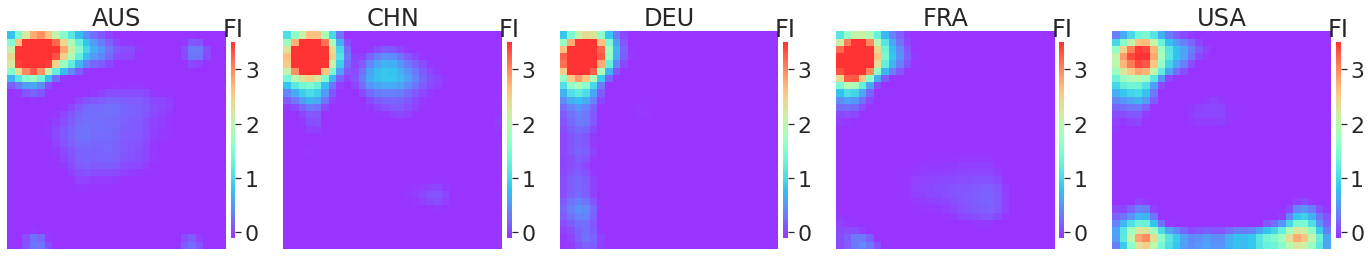

In [43]:
megma = loadmap('./megma/megma.all')

fig, axes  = plt.subplots(1, 5, figsize=(24, 4))

for country, ax in zip(countries, axes):
    
    IMPM = dfimp1[country].values.reshape(*megma.fmap_shape)
    #print(IMPM.max().round(1))

    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, ax =ax, xticklabels=0, yticklabels=0, 
                vmin = -0.1, vmax = 3.5, 
                cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })

    ax.set_title(country)
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('FI')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))

    plt.subplots_adjust(wspace = 0.18)

#### 4.2.2 Saliency map country specific MEGMA Fmaps

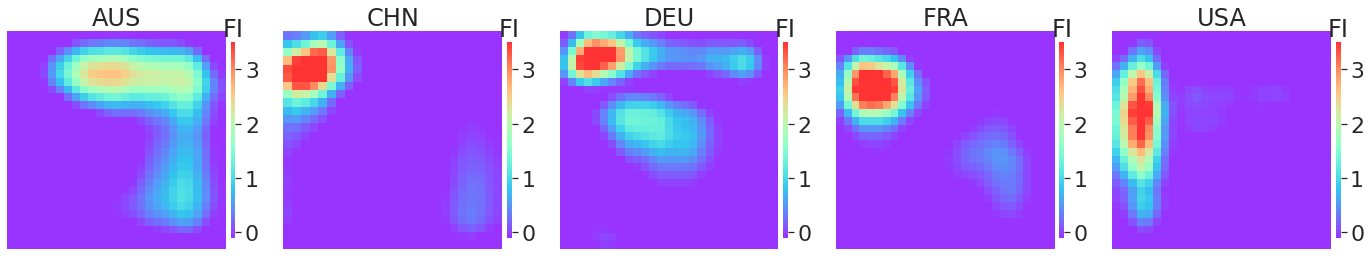

In [44]:
fig, axes  = plt.subplots(1, 5, figsize=(24, 4))

for country, ax in zip(countries, axes):

    fmap_shape, reshape_idx =  reshape_indexes[country]
    IMPM = dfimp2.loc[reshape_idx][country].values.reshape(*fmap_shape)
    #print(IMPM.max().round(1))

    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, ax =ax, xticklabels=0, yticklabels=0, 
                vmin = -0.1, vmax = 3.5,  
                cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })

    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

    ax.set_title(country)
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('FI')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))

    plt.subplots_adjust(wspace = 0.18)

----

### 4.3 Global feature importance correlation

lets calculate the correlations between the global feature importance (GFI) scores in different countries.


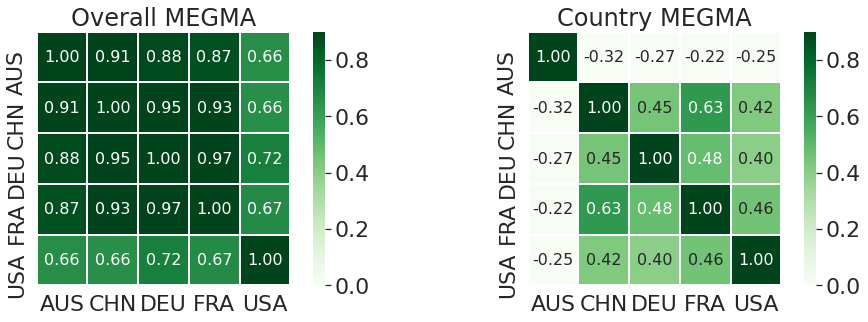

In [56]:

fig, axes = plt.subplots(ncols = 2, figsize=(14,5))

ax1, ax2 = axes

sns.heatmap(dfimp1.corr(), annot=True, fmt='.2f', linewidths=.3, ax = ax1,
                 annot_kws={"size": 16}, square=True,robust=True, vmin = 0, vmax = 0.9,
                 cmap='Greens')

sns.heatmap(dfimp2.corr(), annot=True, fmt='.2f', linewidths=.3, ax = ax2,
                 annot_kws={"size": 16}, square=True,robust=True, vmin = 0, vmax = 0.9,
                 cmap='Greens')

ax1.set_title("Overall MEGMA")
ax2.set_title("Country MEGMA")

plt.tight_layout()

fig.savefig('./images/GFI_megma_all_vs_megma_country.png', bbox_inches='tight', dpi=400) 
dfimp1.to_csv('./images/STST_GFI_megma_all.csv')
dfimp2.to_csv('./images/STST_GFI_megma_specific.csv')

Let's show the important microbes in the hot zones

In [57]:
dfimp1.mean(axis=1).sort_values(ascending=False).head(20)

Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754]      5.218354
Parvimonas sp. [ref_mOTU_v2_4961]                            4.979554
unknown Dialister [meta_mOTU_v2_5867]                        4.836612
Alloprevotella tannerae [ref_mOTU_v2_4636]                   4.834034
Peptostreptococcus anaerobius [ref_mOTU_v2_0148]             4.693618
Prevotella oris [ref_mOTU_v2_0520]                           4.692594
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429]         4.499776
Parvimonas sp. [ref_mOTU_v2_5245]                            4.463052
Pyramidobacter piscolens [ref_mOTU_v2_4064]                  4.232398
Parvimonas micra [ref_mOTU_v2_1145]                          4.171736
Streptococcus constellatus/intermedius [ref_mOTU_v2_0143]    3.993972
Fusobacterium nucleatum s. animalis [ref_mOTU_v2_0776]       3.772395
Streptococcus anginosus [ref_mOTU_v2_0004]                   3.696676
Streptococcus anginosus [ref_mOTU_v2_0351]                   3.673769
Porphyromonas somera

In [58]:
S1 = dfimp2.AUS.sort_values(ascending=False).head(20).index.to_list()
S2 = dfimp2.CHN.sort_values(ascending=False).head(20).index.to_list()
S3 = dfimp2.DEU.sort_values(ascending=False).head(20).index.to_list()
S4 = dfimp2.FRA.sort_values(ascending=False).head(20).index.to_list()
S5 = dfimp2.USA.sort_values(ascending=False).head(20).index.to_list()

In [59]:
set(S2) & set(S3) & set(S4)

{'Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754]',
 'Parvimonas micra [ref_mOTU_v2_1145]',
 'unknown Dialister [meta_mOTU_v2_5867]'}

### 4.4 Discussions and conclusions on saliency map

We can see that there are some notable regions on the saliency map, i.e., the hot zones. The microbes in these zones are important microbes. For the 5 detection models built from `megma_all` transformed Fmaps, all of the important zones is in the left upper conner (as shown in **Fig.1**), and their GFI scores are highly-correlated to each other.

![s](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/images/fmap_Smap_overall.png)
**Fig. 1**: Fmaps generated by overall `megma` and the saliency maps.

----
For the 5 detection models built from country-specific `megma` transformed Fmaps, the important zones located in different areas(as shown in **Fig.2**), but the GFI values are highly-correlated among the four countries of CHN, FRA, DEU, and USA.

![s](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/images/fmap_Smap_specific.png)
**Fig. 2**: Fmaps generated by country-specific `megma` and the saliency maps.

By fitting megma with different data, the 2D arrangement of microorganisms is different. Therefore, the hot zones for the country-specific megma is in different regions. Although the hot regions are different, the microbes in these regions may be in high consistant (for examples, the species of *Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754]*, *Parvimonas sp. [ref_mOTU_v2_4961]*, and *unknown Dialister [meta_mOTU_v2_5867]* are located in these zones.). 

We can see that the performance of the models trained based on these Fmaps is also different. The performance of the model is increased if the key microbes are clustered together, so that the hotspots can also be seen in the saliency map. For example, the STST performance for the country-specific `megma_AUS` is worst among the 5 countries, and the hot zone and GFI calculated also shows not so consistant with the rest countries.

In conclusion, the overall `megma` (fitted by all metagenomic abundance data) shows better performance than country-specific `megma` (fitted by one country metagenomic abundance data), suggesting that unsupervised `megma` should also be fitted on larger samples. The MEGMA-AggMapNet-Explainer pipeline can be used to identify important microbes.